In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
import matplotlib.mlab as mlab
%matplotlib inline

## Current Voltage Curve

In [38]:
V_annode = np.array([0,-0.2, -0.409, -0.601, -0.801, 1.006, -2.003, -3.002, 0.2, 0.405, 0.603, 0.8, 1.001, 1.206, 1.405, 1.607, 2.005, 2.498, 2.999])
Current = np.array([5, 1.82, 0.325, 0.0305, -0.001, -0.005, -0.008, -0.009, 9.27, 13.7, 17.28, 19.91, 21.89, 23.38, 24.43, 25.34, 27.06, 28.52, 29.4])

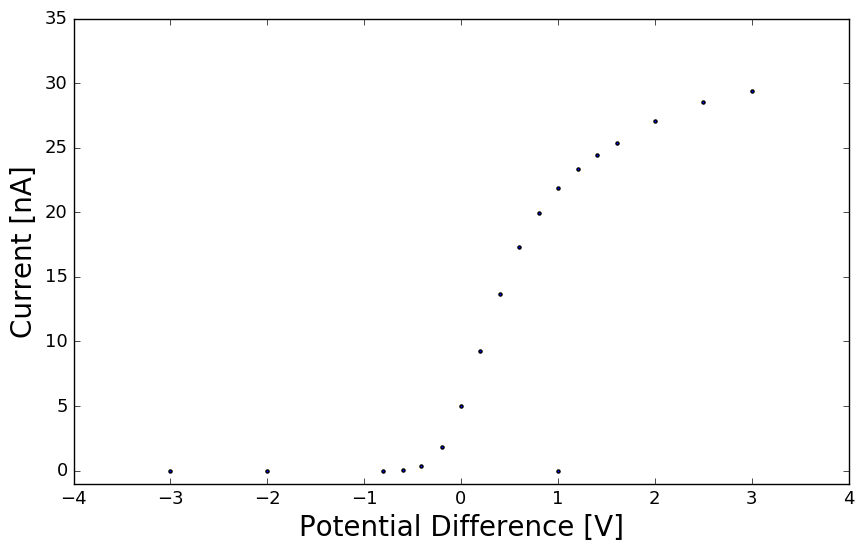

In [39]:
plt.figure(figsize=(10,6));


plt.scatter(V_annode,Current,marker='.');
plt.xlabel('Potential Difference [V]',fontsize=20);
plt.ylabel('Current [nA]',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.ylim(-1,35);
plt.xlim(-4,4);

## Stopping Voltage / Intensity

## Planck's Constant

In [40]:
Wavelengths = np.array([578, 546.1, 435.8, 404.7, 365.0])*1e-9 #nm
Frequencies = np.array([3*1e8/entry for entry in Wavelengths])
Strayf = Frequencies[0] #This data point is unresolved blend
Frequencies = Frequencies[1:]

In [41]:
StoppingVoltages = np.array([-0.742, -0.727, -1.305, -1.533, -1.9])*(-1)
StrayV = StoppingVoltages[0]
StoppingVoltages = StoppingVoltages[1:]

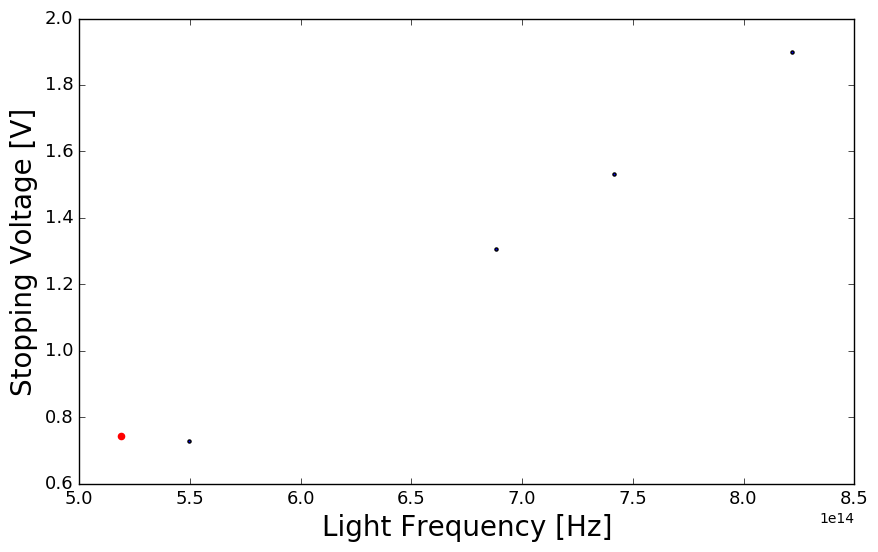

In [42]:
plt.figure(figsize=(10,6));


plt.scatter(Frequencies,StoppingVoltages,marker='.');
plt.scatter(Strayf,StrayV,color='red')
plt.xlabel('Light Frequency [Hz]',fontsize=20);
plt.ylabel('Stopping Voltage [V]',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);

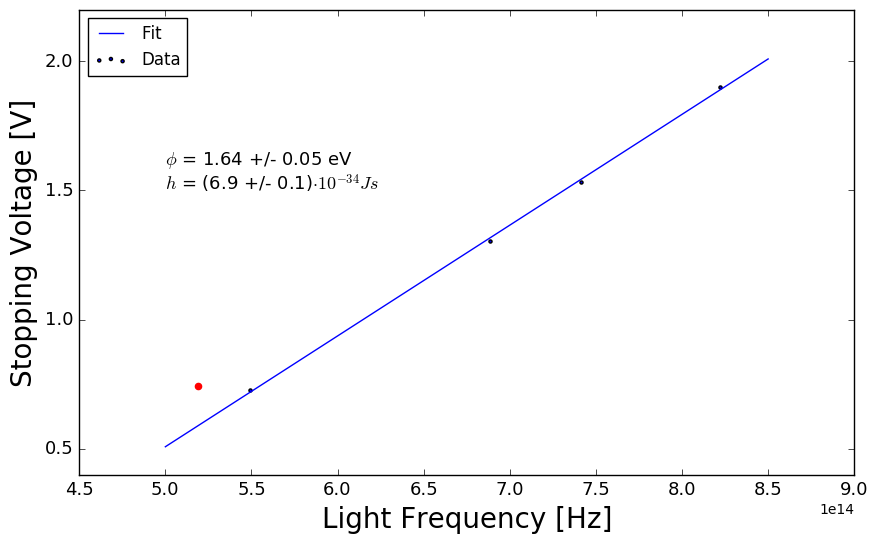

In [44]:
def myfun(f,h,phi):
    q = 1.602176*1e-19
    ans =  h*f/q - phi # this is y, "the function to be fit"
    #h planck
    #phi work function in ev
    return ans

p0 = [1e-34, 3] #guess

xspace = np.linspace(0.5*1e15,0.85*1e15) 

plsq, pcov = curve_fit(myfun, Frequencies, StoppingVoltages, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
h = plsq[0]
eh = np.sqrt(pcov[0,0])
phi = plsq[1]
ephi = np.sqrt(pcov[1,1])

yfit = myfun(xspace,plsq[0],plsq[1])  # use fit results for a, b, c

plt.figure(figsize=(10,6));


plt.scatter(Frequencies,StoppingVoltages,marker='.',label='Data');
plt.scatter(Strayf,StrayV,color='red')
plt.plot(xspace,yfit,label='Fit')
plt.legend(loc='best')
plt.xlabel('Light Frequency [Hz]',fontsize=20);
plt.ylabel('Stopping Voltage [V]',fontsize = 20);
plt.text(5e14,1.5,'$h$ = (%.1f +/- %.1f)$\cdot 10^{-34} Js$ ' % (plsq[0]*1e34, np.sqrt(pcov[0,0])*1e34),size=13)
plt.text(5e14,1.6,'$\phi$ = %.2f +/- %.2f eV' % (plsq[1], np.sqrt(pcov[1,1])),size=13)
plt.xticks(size = 13);
plt.yticks(size = 13);